# Data Analysis of ImageDataset
- **Overview:**  
- This notebook analyzes the ImageDataset created in the previous project. The dataset contains images stored in category-named folders and a CSV metadata file (`metadata.csv`) with details such as image URL, filename, and resolution.

- **Goals:**  
    - Load and explore the metadata CSV.
    - Summarize the number of images per category.
    - Process and analyze resolution information.
    - Visualize distributions (image dimensions, counts per category).
    - Display sample images from selected categories.
    - Compute image histograms and use them as features.
    - Apply PCA  to visualize image feature clustering.
    - Train and evaluate a Deep Learning CNN Model for Image Classification

###  **Dataset Structure:**  
 ```
 ImageDataset/
 ├── metadata.csv
 ├── Nature/
 ├── Animals/
 ├── Cars/
 └── ... (other categories)
```

## Step 1: Import Required Libraries
- We use `pandas` for data handling, `matplotlib` and `seaborn` for visualization, `PIL` for image processing, and scikit-learn for PCA and t-SNE. The IPython display is used to show images inline.

In [3]:
# %%
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from IPython.display import display
import numpy as np

# For advanced analysis: PCA and t-SNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

C:\Users\iitia\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
# Configure visualization styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


## Step 2: Load Metadata
- We load the `metadata.csv` file which contains details on each downloaded image such as:
    - `category`: The label for the image.
    - `image_url`: The source URL for the image.
    - `filename`: The name under which the image was saved.
    - `resolution`: The resolution in the format `widthxheight`.

In [5]:
# Define the base directory and metadata file path
base_dir = "ImageDataset"
metadata_path = os.path.join(base_dir, "metadata.csv")

# Load metadata into a pandas DataFrame
metadata_df = pd.read_csv(metadata_path)
print("Metadata loaded successfully!")
print(metadata_df.head())

Metadata loaded successfully!
  category                                          image_url      filename  \
0   Nature  https://encrypted-tbn0.gstatic.com/images?q=tb...  Nature_1.jpg   
1   Nature  https://encrypted-tbn0.gstatic.com/images?q=tb...  Nature_2.jpg   
2   Nature  https://encrypted-tbn0.gstatic.com/images?q=tb...  Nature_3.jpg   
3   Nature  https://encrypted-tbn0.gstatic.com/images?q=tb...  Nature_4.jpg   
4   Nature  https://encrypted-tbn0.gstatic.com/images?q=tb...  Nature_5.jpg   

  resolution  
0      82x46  
1      69x46  
2    285x177  
3    275x183  
4    275x183  


## Step 3: Basic Data Exploration
- Let's take a look at some basic statistics and the distribution of our data.

In [6]:
# Overview of the dataset
print("Number of images:", len(metadata_df))
print("\nColumns:", metadata_df.columns.tolist())

# Check unique categories and their counts
category_counts = metadata_df['category'].value_counts()
print("\nNumber of images per category:\n", category_counts)


Number of images: 1000

Columns: ['category', 'image_url', 'filename', 'resolution']

Number of images per category:
 category
Nature          50
Animals         50
Space           50
Urban           50
Landscapes      50
Underwater      50
Birds           50
Insects         50
Cityscapes      50
Art             50
Technology      50
Fashion         50
Sports          50
Architecture    50
Food            50
Beaches         50
Mountains       50
Flowers         50
Cars            50
Portraits       50
Name: count, dtype: int64


## Step 4: Process Resolution Information
- The `resolution` column is in the format `widthxheight` (e.g., `800x600`). We'll extract the width and height into separate columns.


In [7]:
# Define a helper function to split resolution
def extract_dimensions(res_str):
    try:
        width, height = res_str.split('x')
        return int(width), int(height)
    except Exception:
        return None, None

# Apply the function to create new columns
metadata_df['width'], metadata_df['height'] = zip(*metadata_df['resolution'].apply(extract_dimensions))

# Display updated dataframe info
print("\nUpdated Metadata with dimensions:")
print(metadata_df.head())



Updated Metadata with dimensions:
  category                                          image_url      filename  \
0   Nature  https://encrypted-tbn0.gstatic.com/images?q=tb...  Nature_1.jpg   
1   Nature  https://encrypted-tbn0.gstatic.com/images?q=tb...  Nature_2.jpg   
2   Nature  https://encrypted-tbn0.gstatic.com/images?q=tb...  Nature_3.jpg   
3   Nature  https://encrypted-tbn0.gstatic.com/images?q=tb...  Nature_4.jpg   
4   Nature  https://encrypted-tbn0.gstatic.com/images?q=tb...  Nature_5.jpg   

  resolution  width  height  
0      82x46     82      46  
1      69x46     69      46  
2    285x177    285     177  
3    275x183    275     183  
4    275x183    275     183  


## Step 5: Visualize Image Resolution Distributions
- We can now visualize the distribution of image widths and heights.


C:\Users\iitia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


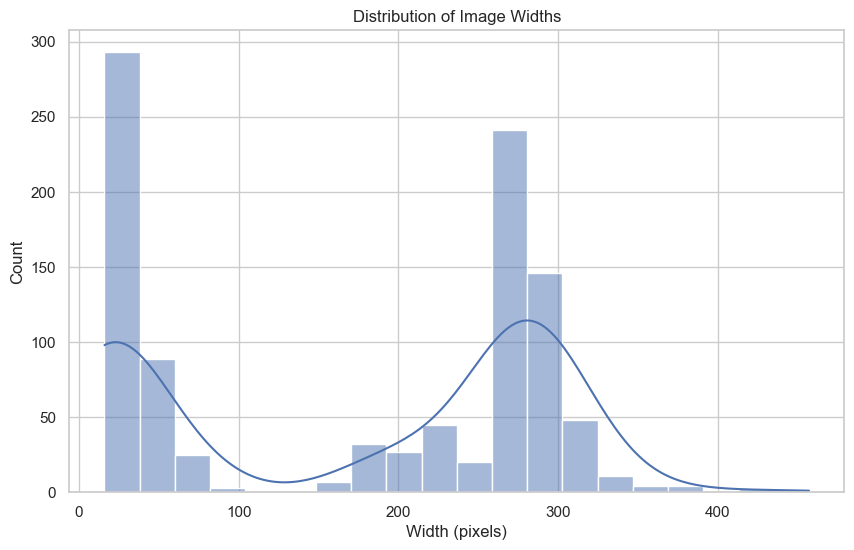

In [8]:
# Plot histogram for image widths
plt.figure()
sns.histplot(metadata_df['width'].dropna(), bins=20, kde=True)
plt.title("Distribution of Image Widths")
plt.xlabel("Width (pixels)")
plt.ylabel("Count")
plt.show()



C:\Users\iitia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


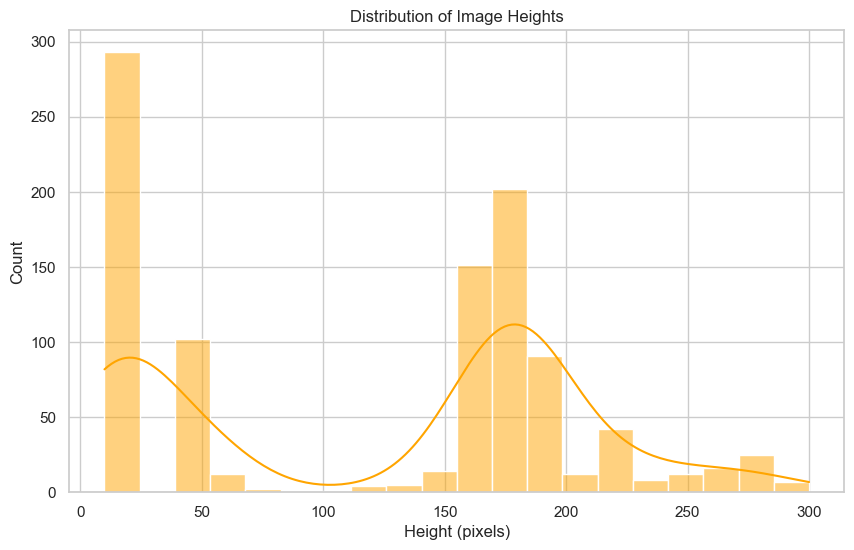

In [9]:
# Plot histogram for image heights
plt.figure()
sns.histplot(metadata_df['height'].dropna(), bins=20, kde=True, color="orange")
plt.title("Distribution of Image Heights")
plt.xlabel("Height (pixels)")
plt.ylabel("Count")
plt.show()

## Step 6: Visualize Number of Images per Category
- A bar plot is a good way to show the distribution of images across categories.

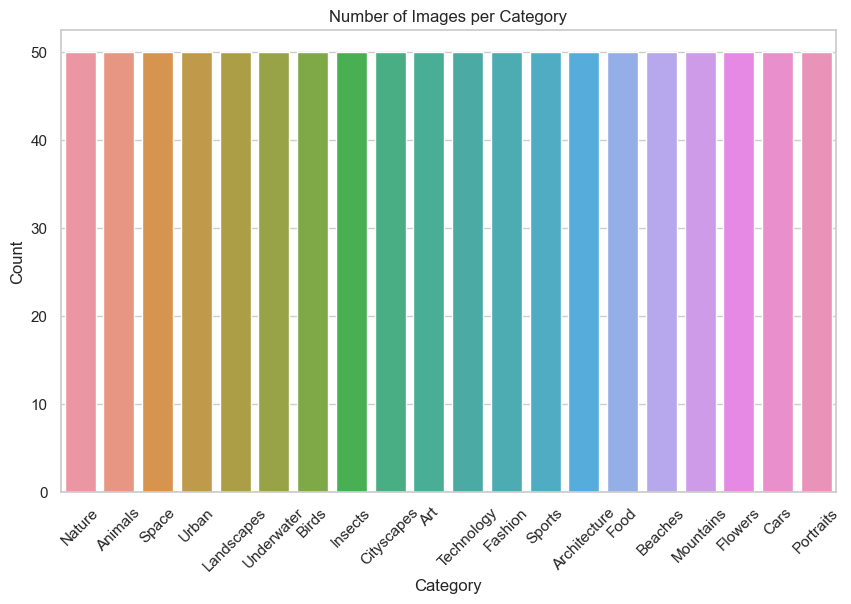

In [10]:

plt.figure()
sns.countplot(data=metadata_df, x='category', order=metadata_df['category'].value_counts().index)
plt.title("Number of Images per Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## Step 7: Display Sample Images from a Few Categories
- To get a better feel for the data, let's display a couple of sample images from selected categories.
- **Note:** This code assumes that the images are stored in subfolders under the base directory (`ImageDataset/<category>/`).


Sample images from category: Nature


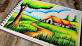

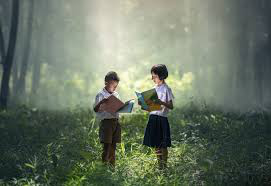

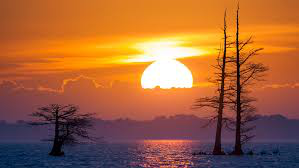


Sample images from category: Animals


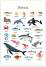

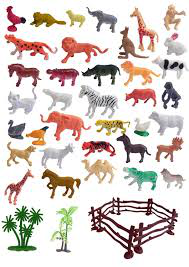

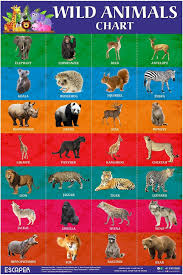

In [11]:
def display_sample_images(category, num_samples=3):
    cat_dir = os.path.join(base_dir, category)
    if not os.path.exists(cat_dir):
        print(f"Directory for category {category} not found.")
        return
    image_files = os.listdir(cat_dir)
    sample_files = image_files[:num_samples]  # taking first few images
    print(f"\nSample images from category: {category}")
    for file in sample_files:
        image_path = os.path.join(cat_dir, file)
        try:
            img = Image.open(image_path)
            display(img)
        except Exception as e:
            print(f"Error displaying image {file}: {e}")

# Display sample images for "Nature" and "Animals"
for cat in ["Nature", "Animals"]:
    display_sample_images(cat)

## Step 8: Advanced Analysis - Feature Extraction, PCA, t-SNE, and Image Histograms
- In this section, we extract features from a subset of images using image histograms.
- **The steps are:**
    - **Feature Extraction:** For a subset (e.g., 5 images per category), compute a grayscale histogram (256 bins).
    - **Dimensionality Reduction:** Use PCA to reduce the 256-dimensional histogram features to 2 dimensions.
    - **t-SNE:** Further explore the feature clustering using t-SNE.
    - **Visualization:** Plot the reduced features and color-code by category.
    - **Image Histogram Display:** For one sample image, display its histogram.
#### This analysis helps us understand the underlying feature distribution across different image categories.

In [12]:
def compute_image_histogram(image_path, bins=256):
    """
    Compute a normalized grayscale histogram for the image.
    """
    try:
        img = Image.open(image_path).convert('L')  # convert to grayscale
        histogram = img.histogram()
        # Normalize the histogram
        hist_array = np.array(histogram, dtype=np.float32)
        hist_array /= hist_array.sum()  # normalization
        return hist_array
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

### Collect Histogram Features for a Subset of Images

In [13]:
# We'll extract features from 5 images per category to keep the computation light.


hist_features = []
labels = []
image_paths = []  # to track which image corresponds to which feature
subset_per_category = 5

for cat in metadata_df['category'].unique():
    cat_dir = os.path.join(base_dir, cat)
    if os.path.exists(cat_dir):
        files = os.listdir(cat_dir)
        files = files[:subset_per_category]  # take a subset
        for file in files:
            path = os.path.join(cat_dir, file)
            feat = compute_image_histogram(path)
            if feat is not None:
                hist_features.append(feat)
                labels.append(cat)
                image_paths.append(path)

hist_features = np.array(hist_features)
print("Extracted histogram features shape:", hist_features.shape)


Extracted histogram features shape: (100, 256)


### Dimensionality Reduction with PCA

PCA result shape: (100, 2)


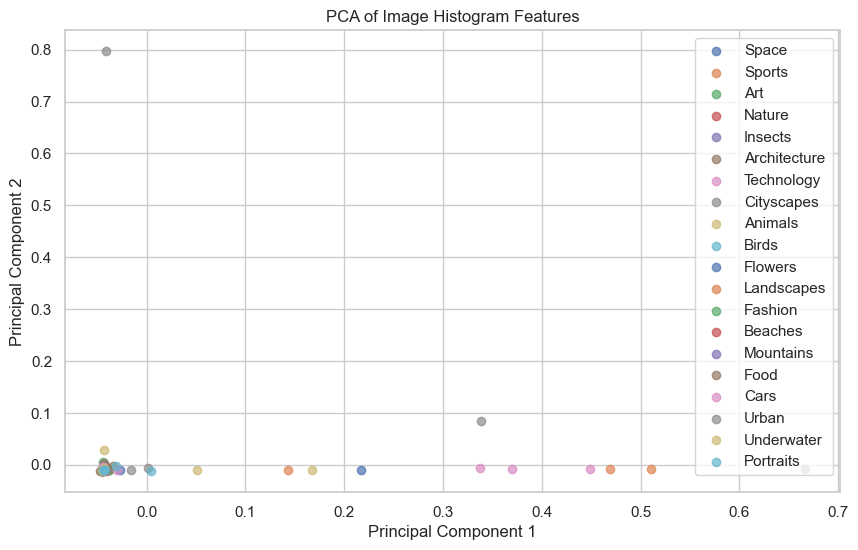

In [14]:
# We'll reduce the 256-dimensional histogram features to 2 dimensions using PCA and visualize the clustering.


pca = PCA(n_components=2)
pca_result = pca.fit_transform(hist_features)
print("PCA result shape:", pca_result.shape)

# Plot PCA results
plt.figure()
unique_labels = list(set(labels))
for lab in unique_labels:
    idx = [i for i, x in enumerate(labels) if x == lab]
    plt.scatter(pca_result[idx, 0], pca_result[idx, 1], label=lab, alpha=0.7)
plt.title("PCA of Image Histogram Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

### Displaying an Image Histogram

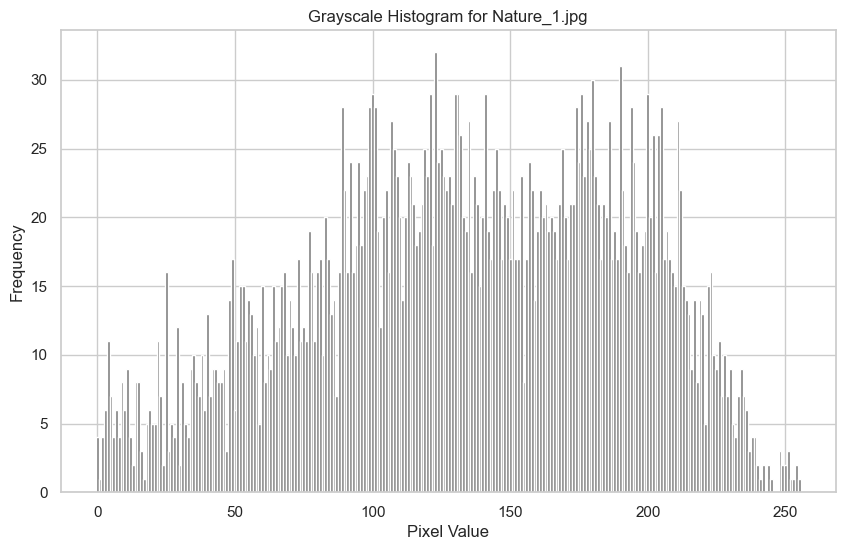

In [16]:
# As an example, let's display the grayscale histogram of one sample image.

sample_image_path = image_paths[0]  # taking the first image from our subset
sample_image = Image.open(sample_image_path).convert('L')
hist = sample_image.histogram()

plt.figure()
plt.bar(range(256), hist, width=1.0, color='gray')
plt.title(f"Grayscale Histogram for {os.path.basename(sample_image_path)}")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

## Step 9: Additional Analysis and Insights
 
- **Further analysis could include:**
    - **Image Quality Analysis:** Investigate if images with higher resolutions or more balanced histograms are common in certain categories.
    - **Correlation Analysis:** Explore correlations between image features (e.g., histogram characteristics) and categories.
    - **Outlier Detection:** Identify images with atypical histograms that might indicate preprocessing issues.

### These insights can help guide further preprocessing and model training strategies.


## Step 10: Train a Deep Learning CNN Model for Image Classification
- **In this section, we'll:**
    - Use Keras' `ImageDataGenerator` to load and augment images from the dataset.
    - Build a CNN model using transfer learning with MobileNetV2.
    - Train the model on the dataset and plot training metrics (accuracy and loss vs. epochs).
    - Evaluate the model using a confusion matrix and classification report.

**Note:** Our dataset is organized in the `ImageDataset/` directory (with one subfolder per category). 




### 10.1: Import Required Libraries for Deep Learning


In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np



### 10.2: Prepare Data Generators
- We'll create training and validation generators using `ImageDataGenerator` with a 20% split for validation.
- Images will be rescaled to [0, 1] and resized to 224x224 pixels.


In [18]:
# Define image dimensions, batch size, and number of epochs
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 16
EPOCHS = 10

# Create an ImageDataGenerator with data augmentation and validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,   # 20% of data for validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Directory containing subfolders for each category
dataset_dir = base_dir  # "ImageDataset"

# Create training generator
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    subset='training',
    class_mode='categorical'
)

# Create validation generator
validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    subset='validation',
    class_mode='categorical'
)


Found 800 images belonging to 20 classes.
Found 200 images belonging to 20 classes.



### 10.3: Build the CNN Model using Transfer Learning

- We use MobileNetV2 (pre-trained on ImageNet) as the base model (without its top classifier).
- The base model is frozen to retain the pre-trained features, and a new classification head is added.


In [19]:
# Load the MobileNetV2 model with pretrained weights
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), 
    include_top=False, 
    weights='imagenet'
)
base_model.trainable = False  # Freeze the base model

# Build the complete model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model with an appropriate optimizer and loss function
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │          25,620 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,283,604 (8.71 MB)

 Trainable params: 25,620 (100.08 KB)

 Non-trainable params: 2,257,984 (8.61 MB)


### 10.4: Train the Model
.


In [20]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS
)


C:\Users\iitia\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
C:\Users\iitia\anaconda3\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 379ms/step - accuracy: 0.0987 - loss: 3.2593 - val_accuracy: 0.2700 - val_loss: 2.5250
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 210ms/step - accuracy: 0.3479 - loss: 2.2074 - val_accuracy: 0.4450 - val_loss: 2.0383
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 214ms/step - accuracy: 0.4861 - loss: 1.7083 - val_accuracy: 0.4450 - val_loss: 2.0411
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 214ms/step - accuracy: 0.5371 - loss: 1.6065 - val_accuracy: 0.4800 - val_loss: 1.8466
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 221ms/step - accuracy: 0.5701 - loss: 1.4940 - val_accuracy: 0.4850 - val_loss: 1.7922
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 211ms/step - accuracy: 0.5886 - loss: 1.3186 - val_accuracy: 0.4700 - val_loss: 1.8052
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 211ms/step - accuracy: 0.6249 - loss: 1.2770 - val_accuracy: 0.5100 - val_loss: 1.8501
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 223ms/step - accuracy: 0.6700 - loss: 1.1791 - val_accu


### 10.5: Plot Training Metrics (Accuracy and Loss vs. Epoch)


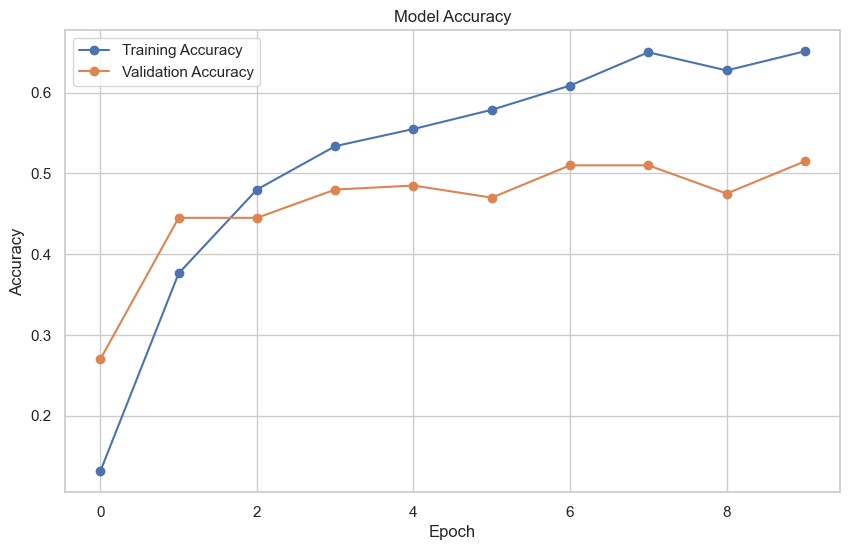

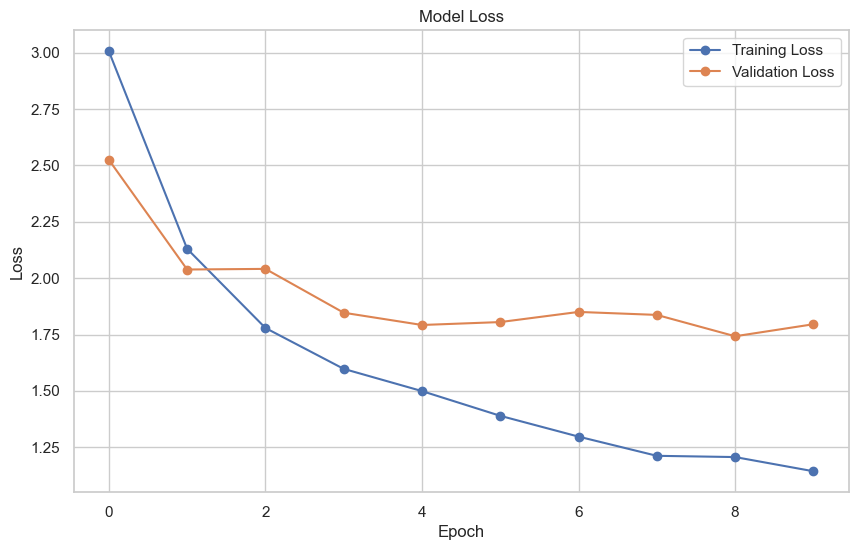

In [21]:
# Plot training and validation accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()



### 10.6: Evaluate the Model with a Confusion Matrix and Classification Report

- We'll predict the classes on the validation set, compute the confusion matrix, and display a classification report.


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 237ms/step
Confusion Matrix:
[[0 3 1 1 0 0 2 1 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 3 0 1 0 0 0 0 0 2 0 1 0 0 0 2 0 0 0 1]
 [2 0 2 0 0 0 2 2 0 0 1 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 2 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0]
 [0 3 0 0 0 1 0 0 0 0 1 1 1 0 1 0 2 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 2 0 1 1 0 2 0 1 1]
 [0 2 1 0 0 0 0 1 1 2 0 2 0 0 0 0 1 0 0 0]
 [0 0 1 1 1 1 1 0 1 1 0 0 0 2 0 0 0 0 0 1]
 [0 0 1 0 0 2 1 1 1 0 2 0 0 0 1 0 0 0 0 1]
 [1 0 0 2 1 1 1 0 0 0 0 0 0 0 0 1 2 1 0 0]
 [0 0 1 0 0 0 2 0 0 1 0 0 1 3 0 0 1 1 0 0]
 [0 2 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 2 0]
 [0 3 1 1 0 0 2 0 0 0 0 1 0 1 0 0 0 0 0 1]
 [0 2 2 0 2 0 0 0 0 1 2 1 0 0 0 0 0 0 0 0]
 [1 1 1 0 1 0 3 0 0 0 0 1 0 0 0 0 0 0 2 0]
 [0 2 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 3 1 0]
 [0 3 2 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1]
 [3 0 0 0 2 0 0 1 1 1 0 0 0 0 0 2 0 0 0 0]
 [0 2 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0]
 [1 0 1 0 0 0 1 0 2 0 0 0 0 2 0 0 1 2 0 0]]


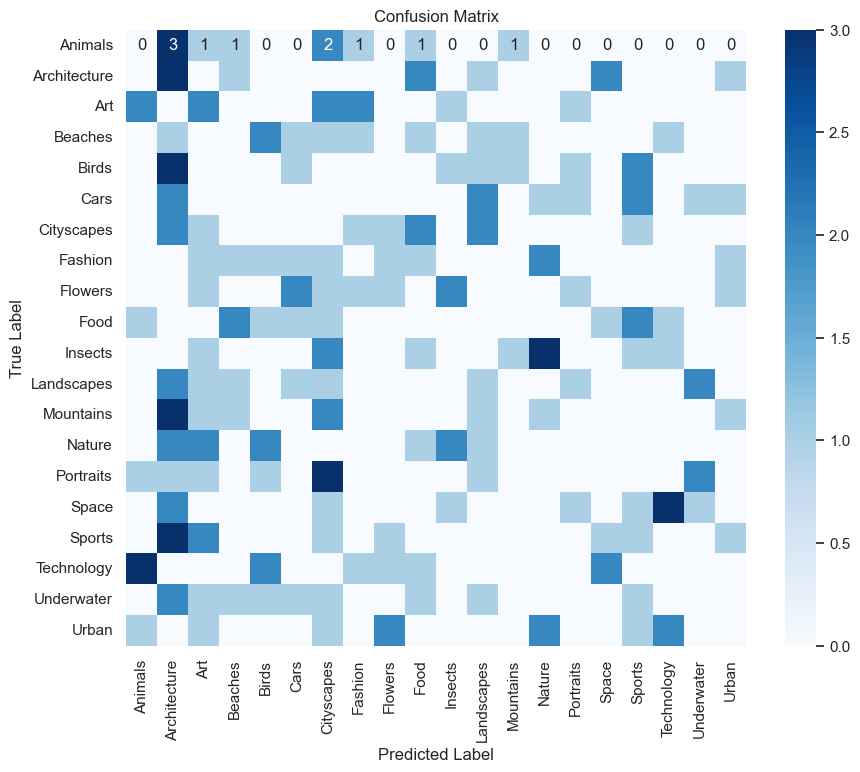

Classification Report:
              precision    recall  f1-score   support

     Animals       0.00      0.00      0.00        10
Architecture       0.10      0.30      0.15        10
         Art       0.12      0.20      0.15        10
     Beaches       0.00      0.00      0.00        10
       Birds       0.00      0.00      0.00        10
        Cars       0.00      0.00      0.00        10
  Cityscapes       0.00      0.00      0.00        10
     Fashion       0.00      0.00      0.00        10
     Flowers       0.14      0.10      0.12        10
        Food       0.00      0.00      0.00        10
     Insects       0.00      0.00      0.00        10
  Landscapes       0.08      0.10      0.09        10
   Mountains       0.00      0.00      0.00        10
      Nature       0.00      0.00      0.00        10
   Portraits       0.00      0.00      0.00        10
       Space       0.00      0.00      0.00        10
      Sports       0.08      0.10      0.09        10
  Te

In [22]:
# Get predictions from the model on the validation set
val_steps = validation_generator.samples // validation_generator.batch_size + 1
predictions = model.predict(validation_generator, steps=val_steps)
predicted_classes = np.argmax(predictions, axis=1)

# True labels from the validation generator
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print a classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


## Conclusion

- **In this notebook, we:**
    - Loaded and explored the ImageDataset metadata.
    - Processed resolution information and visualized distributions.
    - Displayed sample images to inspect data quality.
    - Extracted grayscale image histograms as features.
    - Applied PCA and t-SNE to reduce dimensions and visualize feature clustering.
    - Train and evaluate a Deep Learning CNN Model for Image Classification.

#### This comprehensive analysis lays the groundwork for advanced image preprocessing and model training tasks.